## Project 1 - Analysing Amazon Sales Data 

#### Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise.

In [48]:
#importing python libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
%matplotlib inline 

In [49]:
#Reading the datq
df = pd.read_csv('Amazon Sales data.csv')

In [50]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [51]:
df.shape

(100, 14)

In [52]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [54]:
#Changing the data type of different column for model training and analysis 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [55]:
df['Region'] = df['Region'].astype(str)
df['Country'] = df['Country'].astype(str)
df['Item type'] = df['Item Type'].astype(str)
df['Sales Channel'] = df['Sales Channel'].astype(str)
df['Order Priority'] = df['Order Priority'].astype(str)

In [56]:
#Using Describe function for getting the numerical statistics of a dataset 
df[['Units Sold','Unit Price','Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [57]:
#Adding an extra column of a dataframe which contain month, year and month with year 
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Date Month Year'] = df['Order Date'].dt.strftime('%Y-%m')
df = df.drop(columns=['Order Date'])

In [58]:
df1 = df

In [59]:
#Checking null values 
df1.isnull().sum()

Region                   0
Country                  0
Item Type                0
Sales Channel            0
Order Priority           0
Order ID                 0
Ship Date                0
Units Sold               0
Unit Price               0
Unit Cost                0
Total Revenue            0
Total Cost               0
Total Profit             0
Item type                0
Order Month              0
Order Year               0
Order Date Month Year    0
dtype: int64

In [60]:
#Displaying total values of all the country
pd.set_option('display.max_rows',None)
df1['Country'].value_counts()

The Gambia                          4
Sierra Leone                        3
Sao Tome and Principe               3
Mexico                              3
Australia                           3
Djibouti                            3
Switzerland                         2
Myanmar                             2
Norway                              2
Turkmenistan                        2
Cameroon                            2
Bulgaria                            2
Honduras                            2
Azerbaijan                          2
Libya                               2
Rwanda                              2
Mali                                2
Gabon                               1
Belize                              1
Haiti                               1
Lithuania                           1
San Marino                          1
United Kingdom                      1
Austria                             1
Fiji                                1
Madagascar                          1
Cote d'Ivoir

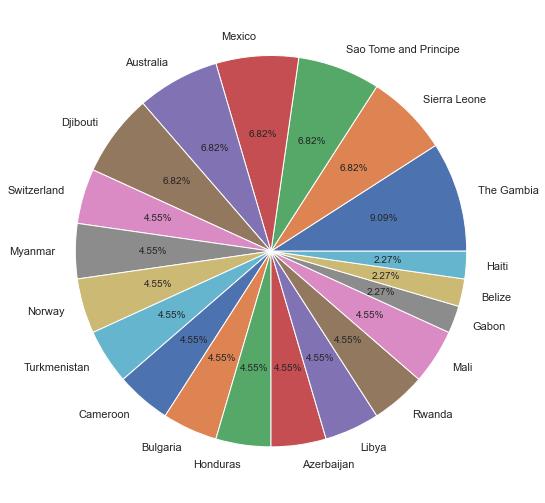

In [61]:
#Pie chart for top 20 countries 
country_names = df1.Country.value_counts().index
country_values = df1.Country.value_counts().values
fig,ax = plt.subplots(figsize=(9,9))
ax.pie(country_values[:20],labels=country_names[:20], autopct='%1.2f%%')
plt.show()

## Exploratory Data Analysis 

###### Checking Outliers 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


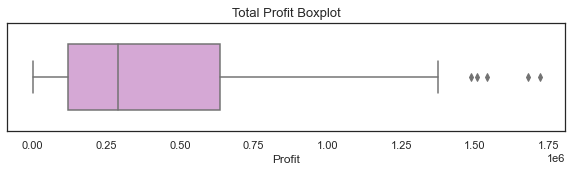

In [62]:
#Box plot for total profit 
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(df1['Total Profit'],color = "plum", width=0.6)
plt.title('Total Profit Boxplot',fontsize = 13)
plt.xlabel('Profit')
plt.show()

In [63]:
def detect_outliers(dataframe,column):
    threshold = 2
    mean = np.mean(column)
    std = np.std(column)
    outliers = []
    
    for i, value in enumerate(column):
        z_score = (value-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])
    
    return outliers

In [64]:
outliers = detect_outliers(df1,df1["Total Cost"])

Region                   Central America and the Caribbean
Country                                           Honduras
Item Type                                        Household
Sales Channel                                      Offline
Order Priority                                           H
Order ID                                         522840487
Ship Date                              2017-02-13 00:00:00
Units Sold                                            8974
Unit Price                                          668.27
Unit Cost                                           502.54
Total Revenue                                   5997054.98
Total Cost                                      4509793.96
Total Profit                                    1487261.02
Item type                                        Household
Order Month                                              2
Order Year                                            2017
Order Date Month Year                              2017-

In [65]:
print(outliers)

[13, 33, 38, 68, 75]


In [66]:
list_length = len(outliers)
print("The list has",list_length,"outliers in Total Cost")

The list has 5 outliers in Total Cost


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


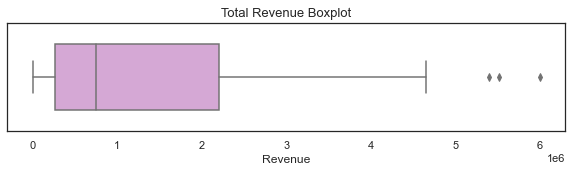

In [67]:
#Box Plot for Total Revenue 
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(df1['Total Revenue'],color = "plum", width=0.6)
plt.title('Total Revenue Boxplot',fontsize = 13)
plt.xlabel('Revenue')
plt.show()

In [68]:
def detect_outliers(dataframe,column):
    threshold = 2
    mean = np.mean(column)
    std = np.std(column)
    outliers = []
    
    for i, value in enumerate(column):
        z_score = (value-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])
    
    return outliers

In [69]:
outliers = detect_outliers(df1,df1["Total Revenue"])

Region                   Central America and the Caribbean
Country                                           Honduras
Item Type                                        Household
Sales Channel                                      Offline
Order Priority                                           H
Order ID                                         522840487
Ship Date                              2017-02-13 00:00:00
Units Sold                                            8974
Unit Price                                          668.27
Unit Cost                                           502.54
Total Revenue                                   5997054.98
Total Cost                                      4509793.96
Total Profit                                    1487261.02
Item type                                        Household
Order Month                                              2
Order Year                                            2017
Order Date Month Year                              2017-

In [70]:
print(outliers)

[13, 33, 38, 68, 74, 75]


In [71]:
list_length = len(outliers)
print("The list has",list_length,"outliers in Total Revenue")

The list has 6 outliers in Total Revenue


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


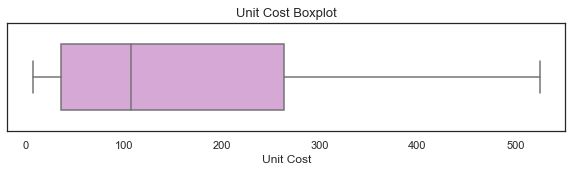

In [72]:
##Box Plot for Unit Cost
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(df1['Unit Cost'],color = "plum", width=0.6)
plt.title('Unit Cost Boxplot',fontsize = 13)
plt.xlabel('Unit Cost')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


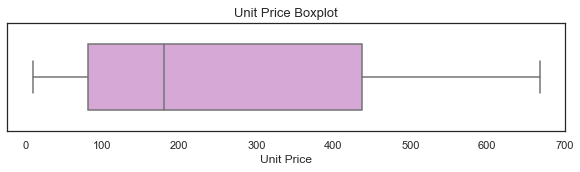

In [73]:
##Box Plot for Unit Price
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(df1['Unit Price'],color = "plum", width=0.6)
plt.title('Unit Price Boxplot',fontsize = 13)
plt.xlabel('Unit Price')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


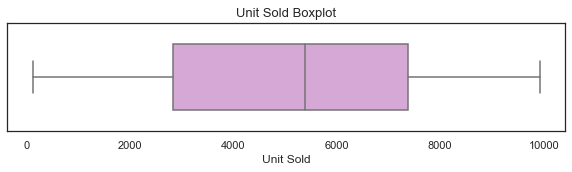

In [74]:
##Box Plot for Unit Sold
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(df1['Units Sold'],color = "plum", width=0.6)
plt.title('Unit Sold Boxplot',fontsize = 13)
plt.xlabel('Unit Sold')
plt.show()

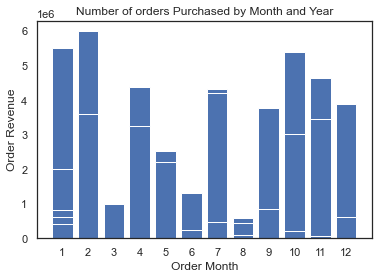

In [75]:
#Creating a bar chart for Total Revenue and Order Month 
plt.bar(df1['Order Month'],df1['Total Revenue'])

#Set the chart title and axis labels 
plt.title('Number of orders Purchased by Month and Year')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Order Revenue')
plt.show()

Text(0.5, 1.0, 'Profit per Year')

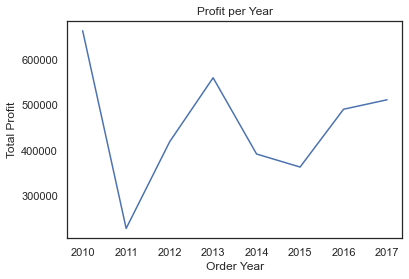

In [76]:
#Plotting a line graph of total profit and order year 
df1.groupby('Order Year')['Total Profit'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.title('Profit per Year')

In [77]:
#Calculating the total revenue for each group with respect to item type and sorting them in descending order
revenue_by_category = df1.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
revenue_by_category

Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total Revenue, dtype: float64

In [78]:
#Calculating the total revenue for each group with respect to item type and sorting them in descending order
revenue_by_profit = df1.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)
revenue_by_profit

Item Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total Profit, dtype: float64

In [79]:
##Calculating correlation of Total Revenue, Total Cost and Total Profit 
print(df[['Total Revenue','Total Cost','Total Profit']].corr())

               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000    0.983928      0.897327
Total Cost          0.983928    1.000000      0.804091
Total Profit        0.897327    0.804091      1.000000


## Predictive Analytics 

In [80]:
#Label Encoding of item type,sales channel and order priority 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["Item Type"] = le.fit_transform(df1["Item Type"])
df1["Sales Channel"] = le.fit_transform(df1["Sales Channel"])
df1["Order Priority"] = le.fit_transform(df1["Order Priority"])

In [81]:
df1 = df1.drop("Region",axis=1)
df1 = df1.drop("Country",axis=1)
df1 = df1.drop("Order Date Month Year",axis=1)
df1 = df1.drop("Order ID",axis=1)
df1 = df1.drop("Ship Date",axis=1)

In [82]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Item type,Order Month,Order Year,Order Date Month Year
0,Australia and Oceania,Tuvalu,0,0,1,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,Baby Food,5,2010,2010-05
1,Central America and the Caribbean,Grenada,2,1,0,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,Cereal,8,2012,2012-08
2,Europe,Russia,8,0,2,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,Office Supplies,5,2014,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,5,1,0,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,Fruits,6,2014,2014-06
4,Sub-Saharan Africa,Rwanda,8,0,2,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,Office Supplies,2,2013,2013-02


# Using PyCaret Library

###### PyCaret is an open-source, low-code machine learning library in Python that allows users to quickly and easily build, compare, and deploy machine learning models on structured and tabular data. It is designed to streamline the machine learning workflow and reduce the amount of code needed to build a model, while still providing users with a high degree of flexibility and control over the modeling process.

In [83]:
#Storing dataframe df in df_ml using PyCaret Library 
df_ml = df

In [87]:
from pycaret.regression import *

In [88]:
reg = setup(data=df_ml,target = 'Total Profit')

,Description,Value
0,Session id,6877
1,Target,Total Profit
2,Target type,Regression
3,Original data shape,"(100, 17)"
4,Transformed data shape,"(100, 36)"
5,Transformed train set shape,"(70, 36)"
6,Transformed test set shape,"(30, 36)"
7,Numeric features,11
8,Date features,1
9,Categorical features,4


In [89]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0587,0.0072,0.0803,1.0000,0.0000,0.0000,1.9710
ridge,Ridge Regression,0.0498,0.0057,0.0696,1.0000,0.0000,0.0000,0.2600
llar,Lasso Least Angle Regression,0.0319,0.0036,0.0500,1.0000,0.0000,0.0000,0.2700
omp,Orthogonal Matching Pursuit,0.0343,0.0039,0.0528,1.0000,0.0000,0.0000,0.2650
en,Elastic Net,5883.2197,75241963.7324,7306.4091,0.9966,0.1924,0.1022,0.2570
lasso,Lasso Regression,9117.8558,337458025.7256,13328.8155,0.9602,0.1902,0.1307,0.2500
br,Bayesian Ridge,7897.6948,390702000.9545,10641.3888,0.9443,0.1195,0.0844,0.2840
et,Extra Trees Regressor,59191.9275,9368175351.2995,84699.7067,0.6805,0.2603,0.2244,0.6040
gbr,Gradient Boosting Regressor,57369.3340,9408006476.7112,85688.4197,0.6150,0.2779,0.2435,0.5670
rf,Random Forest Regressor,97377.0851,21018551603.5093,137264.2650,0.5679,0.3419,0.3131,0.6500


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

In [90]:
#Using Lasso Least Angle Regression Algorithm to create a model 
llar_model = create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0120,0.0002,0.0142,1.0000,0.0000,0.0000
1,0.0468,0.0066,0.0814,1.0000,0.0000,0.0000
2,0.0146,0.0004,0.0193,1.0000,0.0000,0.0000
3,0.0196,0.0006,0.0241,1.0000,0.0000,0.0000
4,0.0520,0.0068,0.0827,1.0000,0.0000,0.0000
5,0.0108,0.0002,0.0134,1.0000,0.0000,0.0000
6,0.0629,0.0107,0.1036,1.0000,0.0000,0.0000
7,0.0150,0.0003,0.0187,1.0000,0.0000,0.0000
8,0.0480,0.0069,0.0828,1.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [91]:
#Tuning the model for better performance 
tuned_llar_model = tune_model(llar_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0108,0.0002,0.0139,1.0000,0.0000,0.0000
1,0.0460,0.0066,0.0813,1.0000,0.0000,0.0000
2,0.0138,0.0004,0.0198,1.0000,0.0000,0.0000
3,0.0194,0.0006,0.0237,1.0000,0.0000,0.0000
4,0.0525,0.0070,0.0834,1.0000,0.0000,0.0000
5,0.0104,0.0002,0.0131,1.0000,0.0000,0.0000
6,0.0636,0.0107,0.1036,1.0000,0.0000,0.0000
7,0.0149,0.0003,0.0187,1.0000,0.0000,0.0000
8,0.0471,0.0067,0.0820,1.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


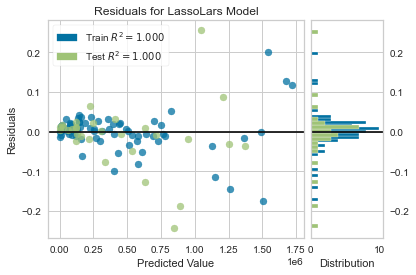

In [93]:
#plot residuals for Lasso Least Regression model 
plot_model(tuned_llar_model)

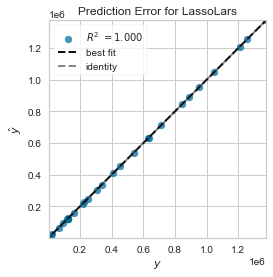

In [94]:
#plot prediction error plot for Lasso Least Regression Model 
plot_model(tuned_llar_model,plot='error')

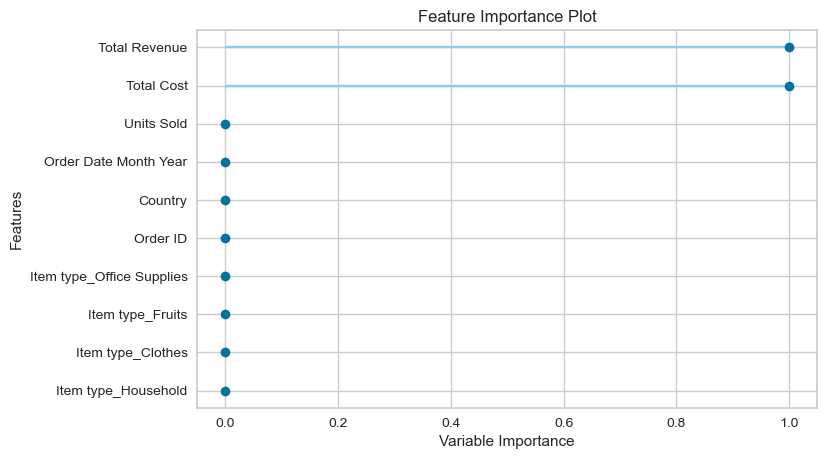

In [96]:
#Plot featured importance plot 
plot_model(tuned_llar_model,plot='feature')

In [97]:
#Predicting total profit using Lasso Linear Regression Model 
predict_model(tuned_llar_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,0.0473,0.0068,0.0823,1.0000,0.0000,0.0000


,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Item type,Order Month,Order Year,Order Date Month Year,Total Profit,prediction_label
20,Europe,Norway,0,1,2,819028031,2014-06-28,7450,255.279999,159.419998,1.901836e+06,1.187679e+06,Baby Food,5,2014,2014-05,7.141570e+05,7.141570e+05
38,Asia,Brunei,8,1,2,320009267,2012-05-08,6708,651.210022,524.960022,4.368316e+06,3.521432e+06,Office Supplies,4,2012,2012-04,8.468850e+05,8.468848e+05
61,Europe,San Marino,0,1,2,569662845,2013-07-01,4750,255.279999,159.419998,1.212580e+06,7.572450e+05,Baby Food,6,2013,2013-06,4.553350e+05,4.553350e+05
59,Sub-Saharan Africa,Djibouti,4,0,1,259353148,2014-04-19,7215,437.200012,263.329987,3.154398e+06,1.899926e+06,Cosmetics,4,2014,2014-04,1.254472e+06,1.254472e+06
85,North America,Mexico,9,0,2,430915820,2012-03-20,6422,81.730003,56.669998,5.248701e+05,3.639348e+05,Personal Care,2,2012,2012-02,1.609353e+05,1.609353e+05
19,Australia and Oceania,East Timor,7,1,2,322067916,2012-09-11,5908,421.890015,364.690002,2.492526e+06,2.154588e+06,Meat,7,2012,2012-07,3.379376e+05,3.379375e+05
1,Central America and the Caribbean,Grenada,2,1,0,963881480,2012-09-15,2804,205.699997,117.110001,5.767828e+05,3.283764e+05,Cereal,8,2012,2012-08,2.484064e+05,2.484064e+05
95,Sub-Saharan Africa,Mali,3,1,3,512878119,2011-09-03,888,109.279999,35.840000,9.704064e+04,3.182592e+04,Clothes,7,2011,2011-07,6.521472e+04,6.521472e+04
2,Europe,Russia,8,0,2,341417157,2014-05-08,1779,651.210022,524.960022,1.158503e+06,9.339038e+05,Office Supplies,5,2014,2014-05,2.245988e+05,2.245988e+05
21,Europe,Portugal,0,1,1,860673511,2015-09-03,1273,255.279999,159.419998,3.249714e+05,2.029417e+05,Baby Food,7,2015,2015-07,1.220298e+05,1.220298e+05


## Implement Linear Regression 

In [98]:
# Select the independent variables and target variable
X = df1[['Item Type', 'Sales Channel', 'Order Priority', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Order Month', 'Order Year']]
y = df1['Total Profit']

In [99]:
#Split the data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [100]:
#Standardizing the dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [101]:
#Performing fit transform on X_train dataframe
X_train = scaler.fit_transform(X_train)

In [102]:
#Performing test on X_test dataframe
X_test = scaler.transform(X_test)

In [103]:
#Applying linear regression on X_train and y_train
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [104]:
#Calculating mean squared error 
mse = cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=5)

In [105]:
np.mean(mse)

-4.986017501524059e-19

In [106]:
reg_pred = regression.predict(X_test)

In [107]:
reg_pred

array([2.25246900e+05, 4.36446250e+05, 6.32512500e+05, 8.52235800e+04,
       4.35499200e+05, 5.03358750e+05, 1.22686500e+05, 7.47939490e+05,
       7.82812000e+03, 9.51410500e+05, 6.34745900e+05, 1.50588807e+06,
       7.66835040e+05, 1.36727250e+06, 1.19685000e+05, 6.39077500e+05,
       1.46875140e+05, 2.35601160e+05, 6.06834720e+05, 5.32525000e+04,
       2.55718080e+05, 1.25802000e+03, 1.30091800e+04, 1.87545030e+05,
       5.39196480e+05, 1.22865120e+05, 7.55559000e+04, 1.51034700e+04,
       5.84073870e+05, 8.99040600e+04])

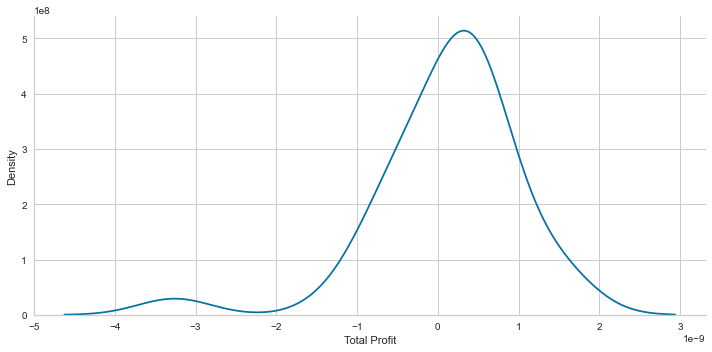

In [108]:
#Creating kernel density
import seaborn as sns 
sns.displot(reg_pred - y_test,kind='kde',height=5,aspect=2)

In [110]:
#Finding accuracy percentage on the basis of r2 score 
from sklearn.metrics import r2_score
score = r2_score(reg_pred,y_test)
accuracy_pct = score * 100
print("Accuracy: {:.2f}%".format(accuracy_pct))

Accuracy: 100.00%


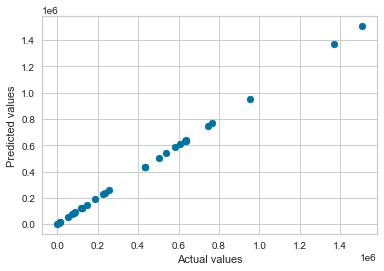

In [112]:
#Plot the predict values against the actual values to visualise how well the model is fitting the data 
plt.scatter(y_test, reg_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [114]:
#Calculating RSE and MRSE to quantify the model's performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, reg_pred)
rmse = np.sqrt(mse)
print('MSE:',mse)
print('RMSE:',rmse)

MSE: 7.921875983854432e-19
RMSE: 8.900492112155615e-10
